# Import

In [1]:
import pandas as pd
from cate.utils import PathLinker

In [4]:
names = [
    "drlearner",
    "xlearner",
    "rlearner",
    "slearner",
    "tlearner",
    # "cevae",
]

# Lenta

## score

In [16]:
pathlinker = PathLinker().data.lenta

In [21]:
output_df = pd.read_csv(pathlinker.prediction / "metaleaner.csv")

In [18]:
cvs = {}
for name in names:
    cv_list = []
    for rank in range(100):
        rank_flg = output_df[f"{name}_rank"] <= rank
        tg_flg = output_df["group"] == 1
        cv = (
            output_df.loc[rank_flg & tg_flg, "response_att"].mean()
            - output_df.loc[rank_flg & ~tg_flg, "response_att"].mean()
        )
        cv_list.append(cv)
    cvs[name] = cv_list

cv_df = pd.DataFrame(cvs)
cv_df.to_csv(pathlinker.output / "metalearner.csv", index=False)

<Axes: >

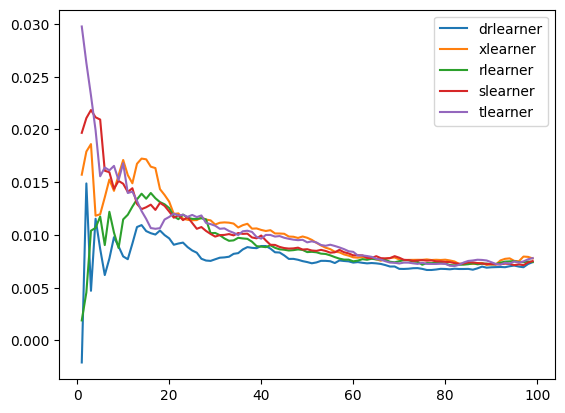

In [19]:
cv_df.plot()

In [20]:
cv_df.iloc[range(0, 100, 10), :]

,drlearner,xlearner,rlearner,slearner,tlearner
0,NaN,NaN,NaN,NaN,NaN
10,0.007965,0.017108,0.011476,0.014856,0.016803
20,0.009675,0.013156,0.012550,0.012221,0.011708
30,0.007694,0.010988,0.010189,0.009843,0.010875
40,0.008950,0.010476,0.008891,0.009945,0.009649
50,0.007428,0.009731,0.008374,0.008646,0.009298
60,0.007378,0.007877,0.007498,0.008070,0.008396
70,0.006785,0.007677,0.007504,0.007841,0.007294
80,0.006774,0.007654,0.007286,0.007447,0.007258
90,0.006936,0.007215,0.007211,0.007241,0.007417


## Duration

In [44]:
time_df = pd.read_csv(
    pathlinker.prediction / "metalearner_duration.csv",
    names=["time", "model", "phase", "event", "description"],
    parse_dates=["time"],
)
start_flg = time_df["event"] == "start"
stop_flg = time_df["event"] == "stop"
start_df = time_df[start_flg].drop("event", axis=1)
stop_df = time_df[stop_flg].drop("event", axis=1)
start_stop_df = pd.merge(
    start_df,
    stop_df,
    on=["model", "phase", "description"],
    suffixes=["_start", "_stop"],
)
duration_df = start_stop_df.loc[:, ["model", "phase", "description"]]
duration_df["duration"] = (
    start_stop_df["time_stop"] - start_stop_df["time_start"]
).apply(lambda x: x.total_seconds())
duration_df = (
    duration_df.loc[:, ["model", "phase", "duration"]]
    .groupby(["model", "phase"])
    .mean()
    .pivot_table(index="model", columns="phase", values="duration")
)

In [45]:
duration_df

phase,predict,train
model,,
drlearner,1.781866,31.410603
rlearner,0.275765,95.187140
slearner,0.702691,17.240649
tlearner,0.700446,17.242079
xlearner,0.440448,30.215927


# Criteo

## Score

In [11]:
pathlinker = PathLinker().data.criteo
output_df = pd.read_csv(pathlinker.prediction / "metaleaner.csv")

In [12]:
cvs = {}
for name in names:
    cv_list = []
    for rank in range(100):
        rank_flg = output_df[f"{name}_rank"] <= rank
        tg_flg = output_df["treatment"] == 1
        cv = (
            output_df.loc[rank_flg & tg_flg, "conversion"].mean()
            - output_df.loc[rank_flg & ~tg_flg, "conversion"].mean()
        )
        cv_list.append(cv)
    cvs[name] = cv_list

cv_df = pd.DataFrame(cvs)
cv_df.to_csv(pathlinker.output / "metalearner.csv", index=False)

<Axes: >

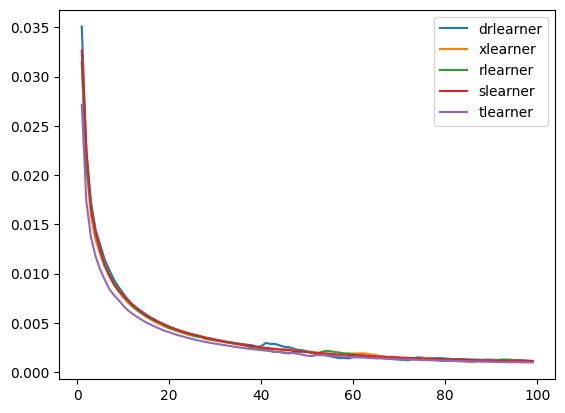

In [13]:
cv_df.plot()

In [14]:
cv_df.iloc[range(0, 100, 10), :]

,drlearner,xlearner,rlearner,slearner,tlearner
0,NaN,NaN,NaN,NaN,NaN
10,0.008005,0.007608,0.007759,0.007773,0.006753
20,0.004622,0.004441,0.004496,0.004612,0.004061
30,0.003313,0.003215,0.003240,0.003295,0.002895
40,0.002620,0.002506,0.002403,0.002514,0.002242
50,0.002107,0.002055,0.002065,0.002047,0.001673
60,0.001532,0.001899,0.001817,0.001723,0.001520
70,0.001296,0.001474,0.001306,0.001491,0.001325
80,0.001389,0.001238,0.001131,0.001311,0.001170
90,0.001279,0.001155,0.001185,0.001174,0.001050


## Duration

In [47]:
time_df = pd.read_csv(
    pathlinker.prediction / "metalearner_duration.csv",
    names=["time", "model", "phase", "event", "description"],
    parse_dates=["time"],
)
start_flg = time_df["event"] == "start"
stop_flg = time_df["event"] == "stop"
start_df = time_df[start_flg].drop("event", axis=1)
stop_df = time_df[stop_flg].drop("event", axis=1)
start_stop_df = pd.merge(
    start_df,
    stop_df,
    on=["model", "phase", "description"],
    suffixes=["_start", "_stop"],
)
duration_df = start_stop_df.loc[:, ["model", "phase", "description"]]
duration_df["duration"] = (
    start_stop_df["time_stop"] - start_stop_df["time_start"]
).apply(lambda x: x.total_seconds())
duration_df = (
    duration_df.loc[:, ["model", "phase", "duration"]]
    .groupby(["model", "phase"])
    .mean()
    .pivot_table(index="model", columns="phase", values="duration")
)

In [48]:
duration_df

phase,predict,train
model,,
drlearner,7.107947,42.385790
rlearner,0.696236,123.016694
slearner,2.063217,24.079742
tlearner,2.122690,24.475430
xlearner,1.432868,48.068939
